# Processo Seletivo Data Science - Projeto Data Science - DataVis - Raccoon

In [1]:
# Importando as bibliotecas necessárias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de estatísticas
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

In [32]:
#Função para calcular o VIF
def calc_vif(df):
  """ 
    Variable Inflation Factors
    VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
    Reference: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Fixing%20Multicollinearity-,What%20is%20Multicollinearity%3F,variable%20in%20a%20regression%20model.
  """
  # Calculando VIF
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

  return(vif)

#Função para plotar o VIF
def plot_vif(vif):
  print('vars: ', list(vif.columns))
  print('Variable Inflation Factors:', vif.VIF.sum(), '\n')

In [3]:
#Importando os dados
df = pd.read_csv("psel - data.csv", encoding="UTF-8", sep=",")

### EDA / Pré-processamento, limpeza dos dados, construção de features

In [4]:
df.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349184,0,4693,0,46739
1,2019-01-02,867328,0,8501,0,83129
2,2019-01-03,758590,0,9375,0,86067
3,2019-01-04,688873,0,8405,0,69363
4,2019-01-05,441760,0,6136,0,56183


In [5]:
df.shape

(639, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   data             639 non-null    object
 1   receita          639 non-null    int64 
 2   transacoes_blog  639 non-null    int64 
 3   transacoes_site  639 non-null    int64 
 4   usuarios_blog    639 non-null    int64 
 5   usuarios_site    639 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 30.1+ KB


In [7]:
# Transformando a variável data
df.data = df.data.astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             639 non-null    datetime64[ns]
 1   receita          639 non-null    int64         
 2   transacoes_blog  639 non-null    int64         
 3   transacoes_site  639 non-null    int64         
 4   usuarios_blog    639 non-null    int64         
 5   usuarios_site    639 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 30.1 KB


In [8]:
# Verificando os nulos nas variáveis
df.isnull().sum().head()

data               0
receita            0
transacoes_blog    0
transacoes_site    0
usuarios_blog      0
dtype: int64

In [10]:
# Resumo das medidas das variáveis quantitativas:
df[["receita", "transacoes_blog", "transacoes_site", "usuarios_blog", "usuarios_site"]].describe(percentiles = [.25, .50, .75, .95, .99]).round(2)

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
count,639.00,639.00,639.00,639.00,639.00
mean,1623891.19,528.35,19039.14,1439.85,101610.49
std,1160581.16,1201.78,13677.73,3369.87,37240.23
min,32085.00,0.00,3557.00,0.00,26298.00
25%,807342.00,0.00,11013.00,0.00,77727.00
50%,1263161.00,0.00,16069.00,0.00,96104.00
75%,2232769.50,0.00,22606.50,0.00,117586.50
95%,3524144.80,3523.10,41208.90,10596.50,169925.50
99%,5306318.60,4637.46,67144.00,12081.26,211699.50
max,12266844.00,5586.00,188955.00,13059.00,369989.00


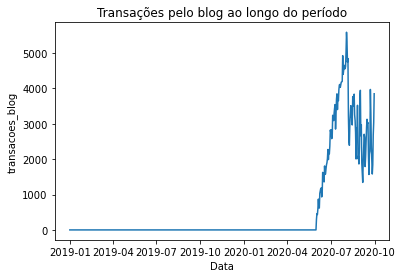

In [11]:
# Plotando as transações realizadas pelo blog ao longo do período
x = df.data
y = df.transacoes_blog
plt.plot(x, y) 
plt.xlabel("Data")  
plt.ylabel("transacoes_blog")  
plt.title("Transações pelo blog ao longo do período")  
plt.show() 

A partir do gráfico de linhas acima, que se refere apenas as transações realizadas por meio do blog, é possível perceber um bom período sem transações, que se refere ao período em que ainda não existia o blog. É visível um crescimento no primeiro mês após a sua criação, depois uma queda, não tendo uma tendência definida, provavelmente por falta de mais dados para se definir melhor.

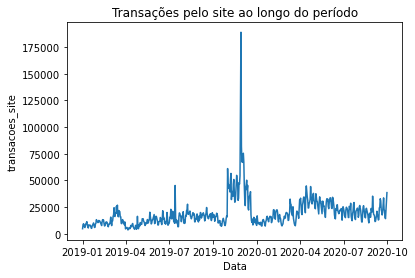

In [12]:
# Plotando as transações realizadas pelo site ao longo do período
x = df.data
y = df.transacoes_site
plt.plot(x, y) 
plt.xlabel("Data")  
plt.ylabel("transacoes_site")  
plt.title("Transações pelo site ao longo do período")  
plt.show() 

Já nesse segundo gráfico, referente apenas as transações efetuadas pelo site, é possível perceber uma constância com pouco crescimento ao longo do período, seguido de um pico marcante entre os meses de outubro de 2019 à janeiro de 2020, provavelmente devido ao período de final de ano, seguido de uma leve tendência de crescimento.

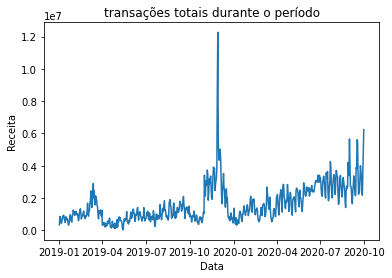

In [13]:
# Plotando as transações realizadas pelo blog e pelo site ao longo do período
x = df.data
y = df.receita
plt.plot(x, y) 
plt.xlabel("Data")  
plt.ylabel("Receita")  
plt.title("transações totais durante o período")  
plt.show() 

Neste último gráfico, temos todas as transações dentro do período, que comparando com o gráfico anterior que mostra apenas transações do site, conseguimos perceber uma tendência de crescimento mais expressiva do meio para o final determinado pelas transações realizadas no blog.

<AxesSubplot:xlabel='transacoes_blog', ylabel='Count'>

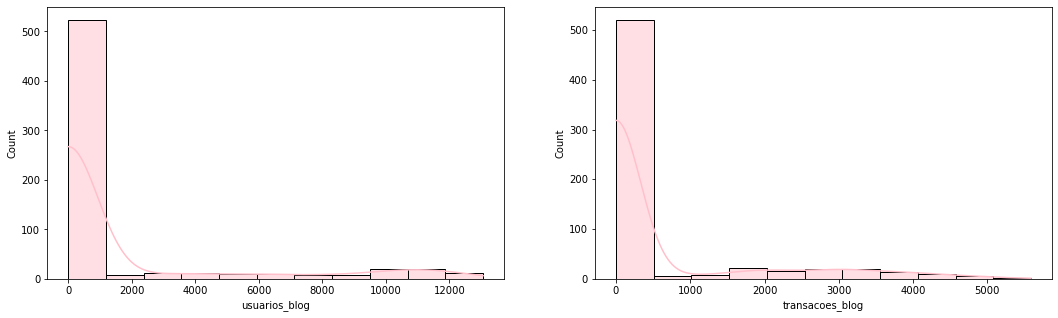

In [14]:
# Verificando distribuição das variáveis referentes ao blog
fig, axs = plt.subplots(1, 2, figsize=(18, 5), squeeze=False)
sns.histplot(data=df, x="usuarios_blog", kde=True, color="pink", ax=axs[0, 0])
sns.histplot(data=df, x="transacoes_blog", kde=True, color="pink", ax=axs[0, 1])

<AxesSubplot:xlabel='log_transacoes_blog', ylabel='Count'>

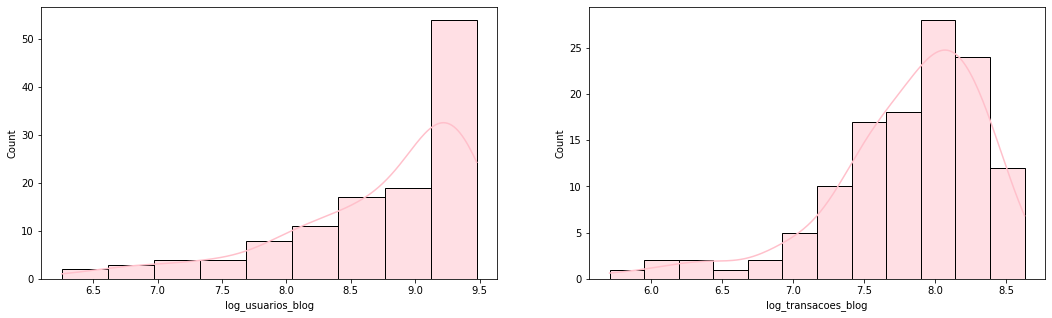

In [15]:
# Criando novas variáveis com o log de usuarios_blog e transacoes_blog
df['log_usuarios_blog'] = np.log(df['usuarios_blog'].values)
df['log_transacoes_blog'] = np.log(df['transacoes_blog'].values)

fig, axs = plt.subplots(1, 2, figsize=(18, 5), squeeze=False)
sns.histplot(data=df, x="log_usuarios_blog", kde=True, color="pink", ax=axs[0, 0])
sns.histplot(data=df, x="log_transacoes_blog", kde=True, color="pink", ax=axs[0, 1])

<AxesSubplot:xlabel='transacoes_site', ylabel='Count'>

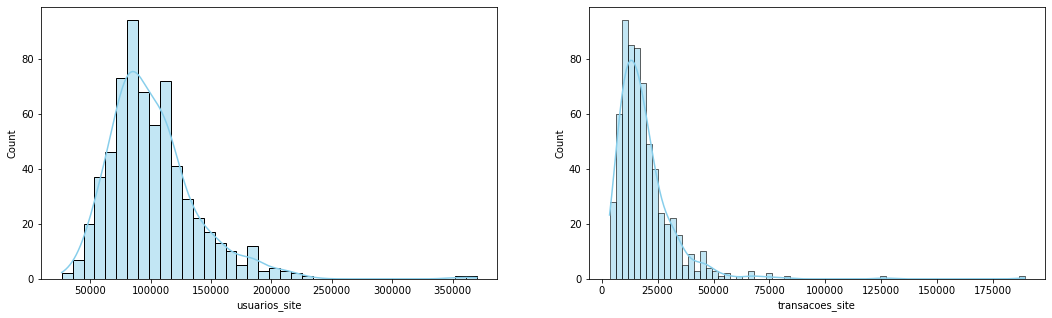

In [16]:
# Verificando distribuição das variáveis referentes ao site
fig, axs = plt.subplots(1, 2, figsize=(18, 5), squeeze=False)

sns.histplot(data=df, x="usuarios_site", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="transacoes_site", kde=True, color="skyblue", ax=axs[0, 1])

<AxesSubplot:xlabel='log_transacoes_site', ylabel='Count'>

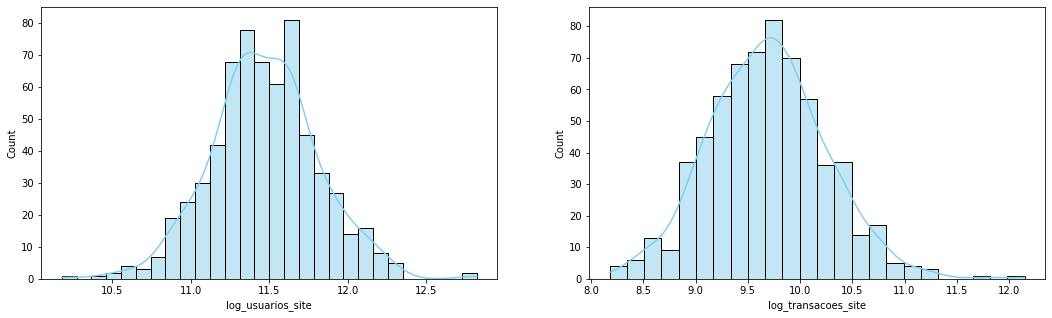

In [17]:
# Criando novas variáveis com o log de usuarios_site e transacoes_site
df['log_usuarios_site'] = np.log(df['usuarios_site'].values)
df['log_transacoes_site'] = np.log(df['transacoes_site'].values)

fig, axs = plt.subplots(1, 2, figsize=(18, 5), squeeze=False)
sns.histplot(data=df, x="log_usuarios_site", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="log_transacoes_site", kde=True, color="skyblue", ax=axs[0, 1])

<AxesSubplot:xlabel='log_receita', ylabel='Count'>

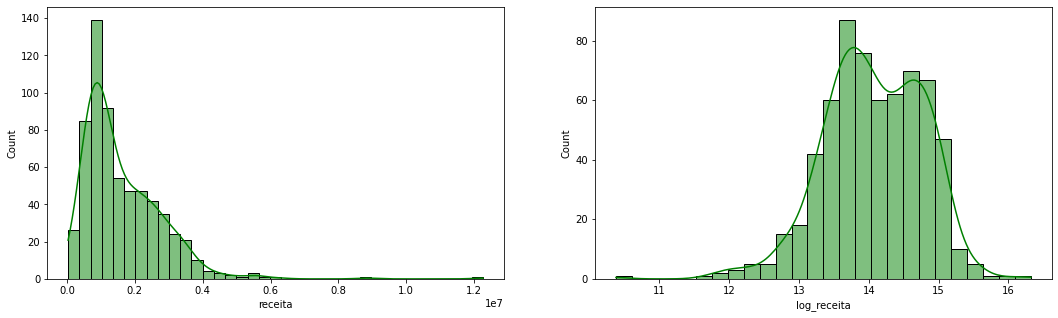

In [18]:
# Verificando distribuição da variável referentes a receita
fig, axs = plt.subplots(1, 2, figsize=(18, 5), squeeze=False)
sns.histplot(data=df, x="receita", kde=True, color="green", ax=axs[0, 0])

# Criando nova variável com o log da receita
df['log_receita'] = np.log(df['receita'].values)
sns.histplot(data=df, x="log_receita", kde=True, color="green", ax=axs[0, 1])

<AxesSubplot:>

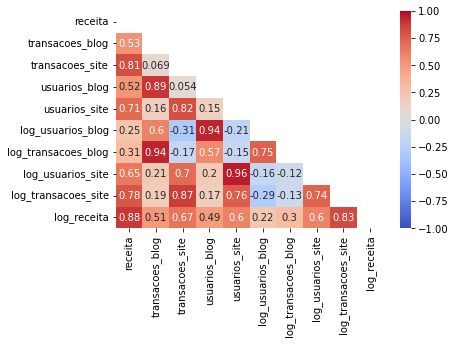

In [36]:
# Verificando correlação entre as variáveis
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, vmin= -1, vmax = 1, cmap = 'coolwarm', mask = mask)

In [20]:
# Variável de interesse
target = 'receita'
print('target:', target)

target: receita


In [21]:
#Correlação das variáveis númericas com a variável de interesse (receita)
corr_matrix[target].sort_values(ascending=False)

receita                1.000000
log_receita            0.883380
transacoes_site        0.812644
log_transacoes_site    0.783698
usuarios_site          0.711175
log_usuarios_site      0.649157
transacoes_blog        0.531721
usuarios_blog          0.518040
log_transacoes_blog    0.306448
log_usuarios_blog      0.254828
Name: receita, dtype: float64

<AxesSubplot:xlabel='receita', ylabel='transacoes_blog'>

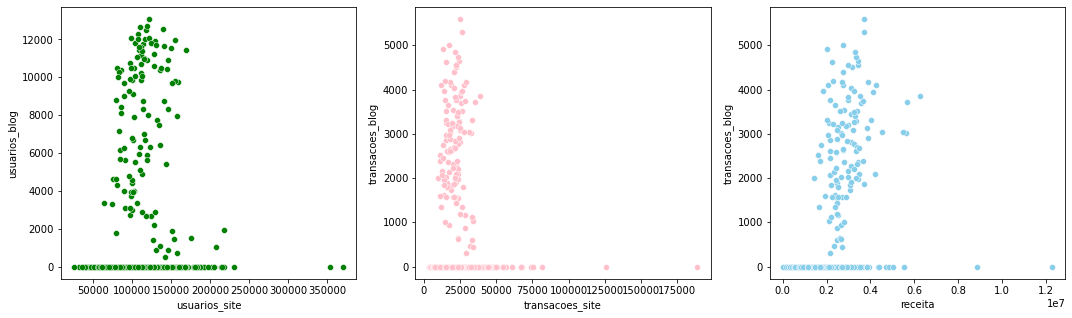

In [26]:
# Verificando graficamente o relacionamento entre as variáveis 
# Gráfico de Dispersão
fig, axs = plt.subplots(1, 3, figsize=(18, 5), squeeze=False)

sns.scatterplot(data=df, x="usuarios_site", y="usuarios_blog", color="green", ax=axs[0, 0])
sns.scatterplot(data=df, x="transacoes_site", y="transacoes_blog", color="pink", ax=axs[0, 1])
sns.scatterplot(data=df, x="receita", y="transacoes_blog", color="skyblue", ax=axs[0, 2])

### Regressão Linear para interpretabilidade

In [37]:
#Usando o VIF (Variance Inflation Factor) para verificar a colinearidade de certos conjutos de variáveis
vars_rl = ["transacoes_blog", "transacoes_site", "usuarios_blog", "usuarios_site"] 
plot_vif(calc_vif(df[vars_rl]))

vars:  ['variables', 'VIF']
Variable Inflation Factors: 26.734671182050526 



O objetivo aqui é achar variáveis explicativas para o modelo que tenham um menor VIF e um maior R2. E isso foi foi alcançado utilizando as variáveis do dataset.

In [38]:
# Criando o modelo de regressão linear com as variáveis do dataset para explicar a variável target 'receita'
vars_rl = ["transacoes_blog", "transacoes_site", "usuarios_blog", "usuarios_site"]
formula ="receita ~ " + ' + '.join(vars_rl)
print('formula: ', formula)

model = smf.ols(formula = formula, data = df).fit()

# Plotando o sumario do modelo
print(model.summary())

formula:  receita ~ transacoes_blog + transacoes_site + usuarios_blog + usuarios_site
                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1423.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          5.58e-315
Time:                        09:44:31   Log-Likelihood:                -9094.5
No. Observations:                 639   AIC:                         1.820e+04
Df Residuals:                     634   BIC:                         1.822e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

O modelo acima explica a variável receita em 90%. Além de outras métricas explicativas que podem nos ajudar a entender melhor a relação entre as variáveis explicativas e o alvo.

In [39]:
#Verificando o VIF das variáveis escolhidas para compor a regressão linear
vif = calc_vif(df[vars_rl])
print('vars: ', vars_rl)
print('Variable Inflation Factors:', vif.VIF.sum(), '\n')
vif

vars:  ['transacoes_blog', 'transacoes_site', 'usuarios_blog', 'usuarios_site']
Variable Inflation Factors: 26.734671182050526 



,variables,VIF
0,transacoes_blog,5.931234
1,transacoes_site,7.224186
2,usuarios_blog,5.872987
3,usuarios_site,7.706264
